<a href="https://colab.research.google.com/github/mohdnadeemece/Global-Student-EDA-2025-machine-learning/blob/main/Global_Student_EDA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('/content/student life.csv')
df

,id,age,gender,grade,avg_sleep_hours,daily_screen_time,uses_AI_for_study,board_exam_prep,stress_level,country
0,1,17,Male,11,6.1,3.3,Yes,On Track,7,Australia
1,2,18,Male,12,8.4,5.7,No,Revised Fully,8,Germany
2,3,15,Female,12,5.2,7.8,Yes,Falling Behind,6,Brazil
3,4,17,Male,11,8.9,5.3,Yes,Just Started,7,Japan
4,5,17,Male,11,6.1,2.1,No,Just Started,5,Japan
...,...,...,...,...,...,...,...,...,...,...
495,496,17,Female,12,7.2,4.9,Yes,Just Started,9,Germany
496,497,17,Male,11,6.0,4.4,Yes,On Track,6,UK
497,498,18,Female,11,4.4,5.1,No,Revised Fully,7,Canada
498,499,15,Female,12,5.9,5.5,Yes,On Track,5,South Korea


In [17]:
df.head()

,id,age,gender,grade,avg_sleep_hours,daily_screen_time,uses_AI_for_study,board_exam_prep,stress_level,country
0,1,17,Male,11,6.1,3.3,Yes,On Track,7,Australia
1,2,18,Male,12,8.4,5.7,No,Revised Fully,8,Germany
2,3,15,Female,12,5.2,7.8,Yes,Falling Behind,6,Brazil
3,4,17,Male,11,8.9,5.3,Yes,Just Started,7,Japan
4,5,17,Male,11,6.1,2.1,No,Just Started,5,Japan


In [21]:
# Value counts for categorical features

categoricals=['gender', 'country', 'uses_AI_for_study', 'grade', 'board_exam_prep']
for col in categoricals:
  print(f'\n value counts:\n {df[col].value_counts()}')


 value counts:
 gender
Male      240
Female    236
Other      24
Name: count, dtype: int64

 value counts:
 country
Australia      60
Japan          54
South Korea    53
Nigeria        52
Germany        50
Brazil         49
Canada         49
India          49
USA            42
UK             42
Name: count, dtype: int64

 value counts:
 uses_AI_for_study
Yes    333
No     167
Name: count, dtype: int64

 value counts:
 grade
12    279
11    221
Name: count, dtype: int64

 value counts:
 board_exam_prep
On Track          174
Revised Fully     118
Falling Behind    117
Just Started       91
Name: count, dtype: int64


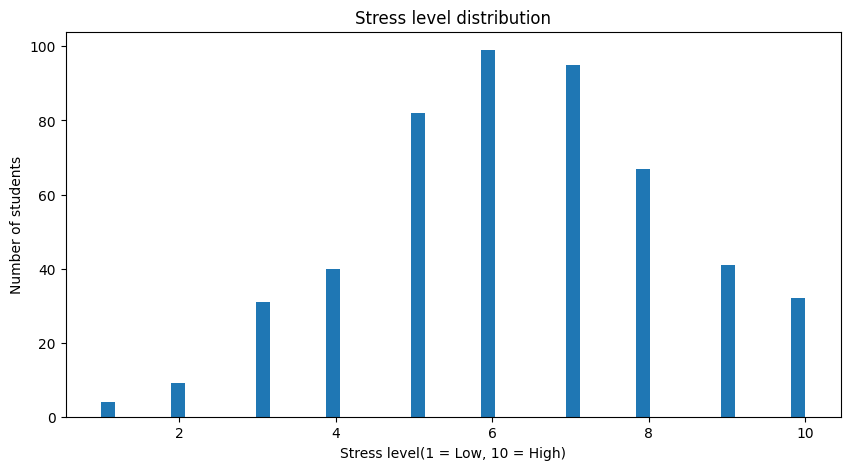

In [39]:
# Stress level distribution
plt.figure(figsize=(10,5))
plt.title('Stress level distribution')
plt.hist(df['stress_level'], bins=50)
plt.xlabel('Stress level(1 = Low, 10 = High)')
plt.ylabel('Number of students')
plt.show()


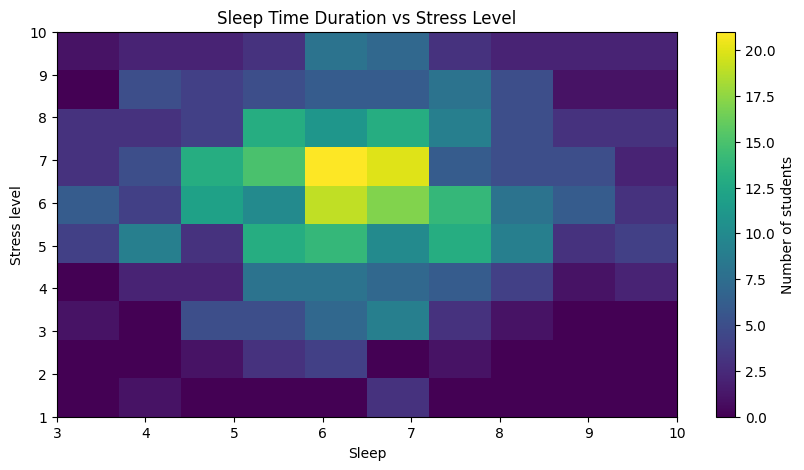

In [50]:
# Sleep vs Stress
plt.figure(figsize=(10,5))
plt.title('Sleep Time Duration vs Stress Level')
plt.xlabel('Sleep')
plt.ylabel('Stress level')
hist = plt.hist2d(df['avg_sleep_hours'],df['stress_level'], bins=(10,10))
plt.colorbar(hist[3], label='Number of students')
plt.grid(False)
plt.show()

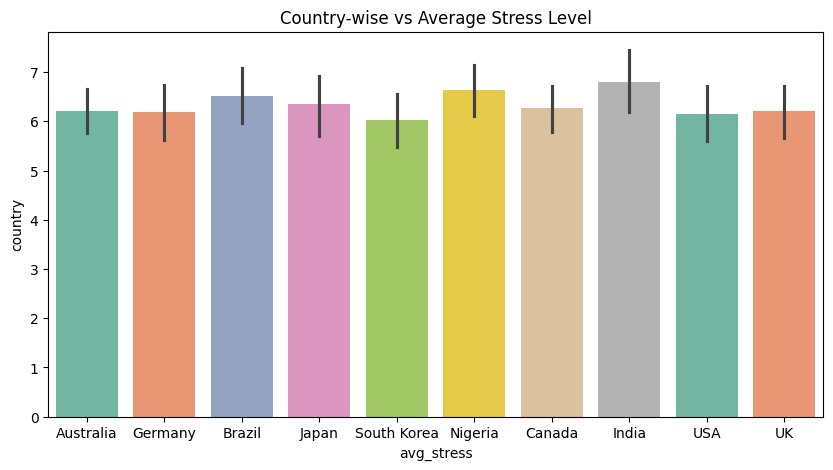

In [66]:
# Country-wise average stress level
avg_stress=df['stress_level'].mean()
plt.figure(figsize=(10,5))
plt.title('Country-wise vs Average Stress Level')
sns.barplot(x='country', y='stress_level', data=df,estimator='mean',palette='Set2')
plt.xlabel('avg_stress')
plt.ylabel('country')
plt.show()


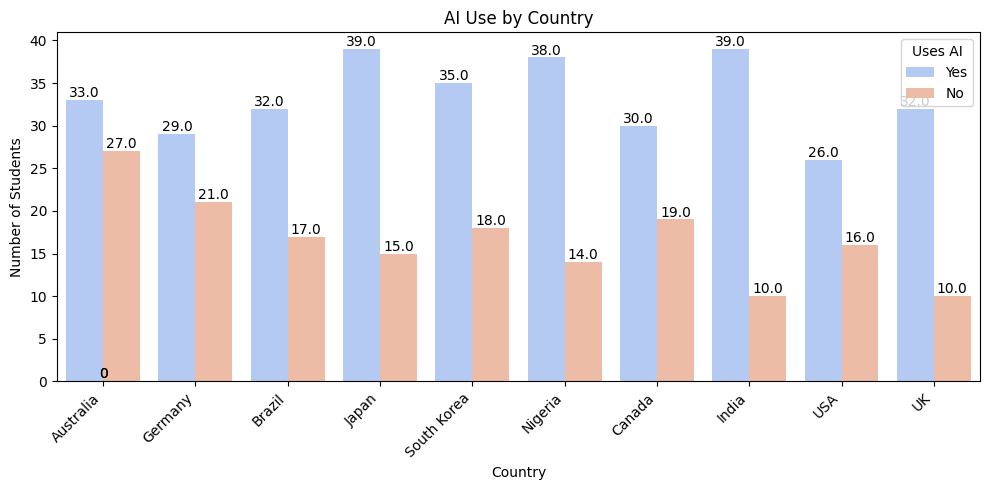

In [75]:
# AI Use by Country

plt.figure(figsize=(10,5))
plt.title('AI Use by Country')
ax = sns.countplot(data=df, x='country', hue='uses_AI_for_study', palette='coolwarm')
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Uses AI')
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

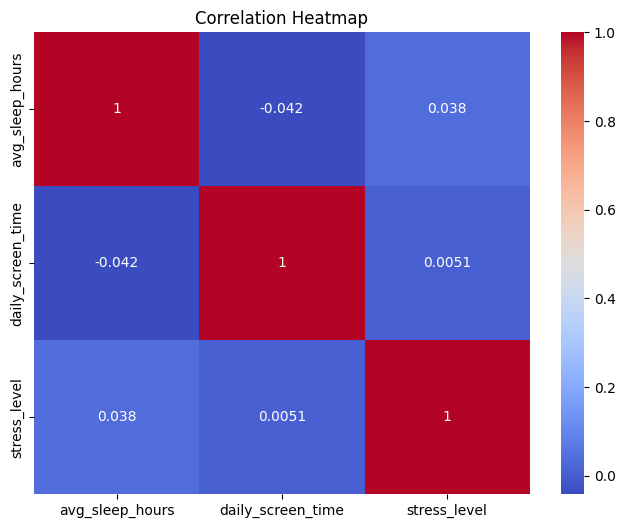

In [79]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['avg_sleep_hours', 'daily_screen_time', 'stress_level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()